In [40]:
# Mount your own google drive to Colab
from google.colab import drive
drive.mount('/content/gdrive')
import sys
# TODO: Change the path below to the path where your folder locates
sys.path.append('/content/drive/My Drive/m146')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [41]:
"""
Author      : Yi-Chieh Wu, Sriram Sankararaman
"""

# This code was adapted from course material by Jenna Wiens (UMichigan).

# python libraries
import os
import time

# numpy libraries
import numpy as np

# matplotlib libraries
import matplotlib.pyplot as plt

In [42]:
######################################################################
# classes
######################################################################

class Data :

    def __init__(self, X=None, y=None) :
        """
        Data class.

        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """

        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y

    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.

        Parameters
        --------------------
            filename -- string, filename
        """

        # load data
        with open(filename, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")

        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]

    def plot(self, **kwargs) :
        """Plot data."""

        if 'color' not in kwargs :
            kwargs['color'] = 'b'

        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)

In [48]:
class PolynomialRegression() :

    def __init__(self, m=1) :
        """
        Ordinary least squares regression.

        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
        """
        self.coef_ = None
        self.m_ = m


    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].

        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features

        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """

        n,d = X.shape

        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model
        # part g: modify to create matrix for polynomial model
        m = self.m_
        if d == m + 1:
            Phi = X
        else:
            Phi = np.concatenate((np.ones(np.shape(X)), X), 1)
            for i in range(2, m + 1):
                Phi = np.concatenate((Phi, np.power(X, i)), 1)


        ### ========== TODO : END ========== ###

        return Phi


    def fit_GD(self, X, y, eta=0.01,
                eps=0, tmax=10000, verbose=False) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes

        Returns
        --------------------
            self    -- an instance of self
        """

        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()

        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration

        # GD loop
        for t in range(tmax) :
            ### ========== TODO : START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None :
                eta = 1/(1+float(t)) # change this line
            else :
                eta = eta_input
            ### ========== TODO : END ========== ###

            ### ========== TODO : START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math
            self.coef_ = self.coef_ - 2*eta*np.dot(np.transpose(X), (np.dot(self.coef_, np.transpose(X)) - y))

            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            y_pred = np.dot(self.coef_, np.transpose(X)) # change this line
            #y_pred = self.predict(X)
            # err_list[t] = self.cost(X, y)
            err_list[t] = np.sum(np.power(y - y_pred, 2)) #/ float(n)
            ### ========== TODO : END ========== ###

            # stop?
            if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
                break

            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t+1], [cost], 'bo')
                plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
                plt.draw()
                plt.pause(0.05) # pause for 0.05 sec

        print('number of iterations: %d'%(t+1))

        return self


    def fit(self, X, y) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            self    -- an instance of self
        """

        X = self.generate_polynomial_features(X) # map features

        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution

        print('Fitting with closed-form solution:')
        start_time = time.time()
        self.coef_ = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(X), X)), np.transpose(X)), y)

        # print '\t --Final Coefficients:'
        # print self.coef_
        print('\t --Final value of objective function: %f' % self.cost(X, y))
        print('\t --Time taken: %f' % (time.time() - start_time))
        ### ========== TODO : END ========== ###


    def predict(self, X) :
        """
        Predict output for X.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features

        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")

        X = self.generate_polynomial_features(X) # map features

        ### ========== TODO : START ========== ###
        # part c: predict y
        y = np.dot(self.coef_, np.transpose(X))
        ### ========== TODO : END ========== ###

        return y


    def cost(self, X, y) :
        """
        Calculates the objective function.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== TODO : START ========== ###
        # part d: compute J(theta)
        cost = np.sum(np.square(self.predict(X) - y))
        ### ========== TODO : END ========== ###
        return cost


    def rms_error(self, X, y) :
        """
        Calculates the root mean square error.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        error = np.sqrt(self.cost(X, y)/np.shape(y))
        ### ========== TODO : END ========== ###
        return error


    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'

        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()

Visualizing data...


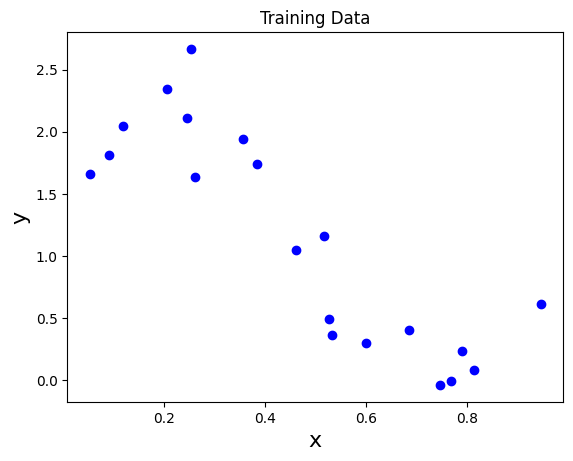

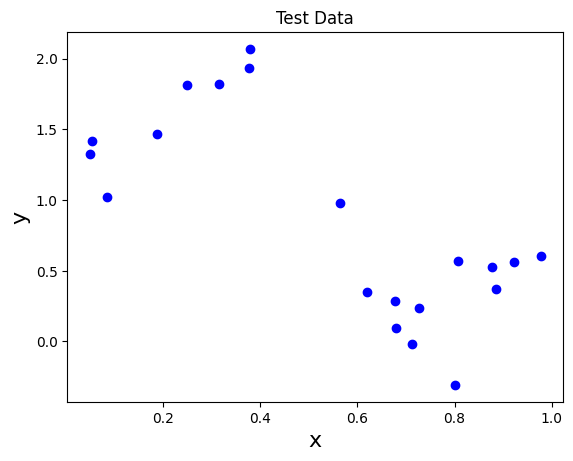

Investigating linear regression...
	 --First Part of D: 40.233847
Linear regression model w/ time = 0.010000
number of iterations: 770
Linear regression model w/ time = 0.001000
number of iterations: 7020
Linear regression model w/ time = 0.000100
number of iterations: 10000
Fitting with varied step size
number of iterations: 770
Investigating polynomial regression...
Fitting with closed-form solution:
	 --Final value of objective function: 32.310618
	 --Time taken: 0.000294
Fitting with closed-form solution:
	 --Final value of objective function: 3.912576
	 --Time taken: 0.000184
Fitting with closed-form solution:
	 --Final value of objective function: 3.895178
	 --Time taken: 0.000181
Fitting with closed-form solution:
	 --Final value of objective function: 1.193349
	 --Time taken: 0.000170
Fitting with closed-form solution:
	 --Final value of objective function: 1.055083
	 --Time taken: 0.000171
Fitting with closed-form solution:
	 --Final value of objective function: 1.028868
	 --T

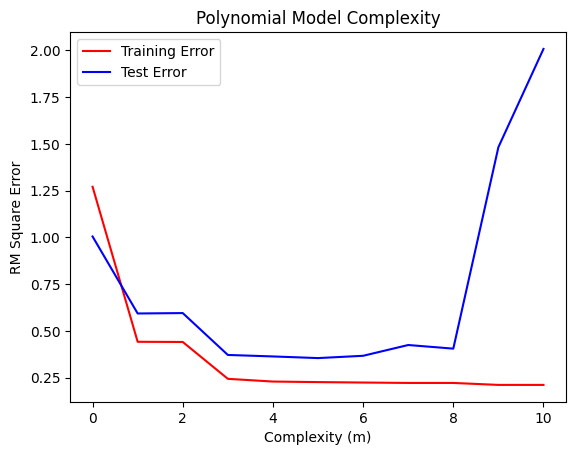

Done!


In [52]:
######################################################################
# main
######################################################################

def main() :
    # load data
    # TODO: Use the abs path on your own Google Drive
    train_data = load_data('/content/gdrive/MyDrive/m146/m146ps2/regression_train.csv')
    test_data = load_data('/content/gdrive/MyDrive/m146/m146ps2/regression_test.csv')

    # print(train_data.X.shape, train_data.y.shape)
    # print(test_data.X.shape, test_data.y.shape)


    ### ========== TODO : START ========== ###
    # part a: main code for visualizations
    print('Visualizing data...')

    # print train_data.y
    plt.title('Training Data')
    plot_data(train_data.X, train_data.y)
    plt.title('Test Data')
    plot_data(test_data.X, test_data.y)

    ### ========== TODO : END ========== ###



    ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression
    print('Investigating linear regression...')
    train_data = load_data('/content/gdrive/MyDrive/m146/m146ps2/regression_train.csv')
    model = PolynomialRegression()

    #Part D
    model.coef_ = np.zeros(2)
    print("\t --First Part of D: %f" % model.cost(train_data.X, train_data.y))

    eta_values = [0.01, 0.001, 0.0001]
    for value in eta_values:
        print("Linear regression model w/ time = %f" % value)
        model.fit_GD(train_data.X, train_data.y, eta=value)

    #Part E
    #model.fit(train_data.X, train_data.y)

    #Part F
    print('Fitting with varied step size')
    model.fit_GD(train_data.X, train_data.y)

    ### ========== TODO : END ========== ###



    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    print('Investigating polynomial regression...')
    degrees = []
    rms_train_errors = []
    rms_test_errors = []

    for m in range(0, 11):
        model = PolynomialRegression(m=m)
        model.coef_ = np.zeros(2)
        model.fit(train_data.X, train_data.y)
        degrees.append(m)
        rms_train_errors.append(model.rms_error(train_data.X, train_data.y)[0])
        rms_test_errors.append(model.rms_error(test_data.X, test_data.y)[0])

    plt.title('Polynomial Model Complexity')
    plt.xlabel('Complexity (m)')
    plt.ylabel('RM Square Error')
    plt.plot(degrees, rms_train_errors, color = 'r', label='Training Error')
    plt.plot(degrees, rms_test_errors, color ='b', label='Test Error')
    plt.legend(loc='upper left')
    plt.show()
    ### ========== TODO : END ========== ###




    print("Done!")

if __name__ == "__main__":
    main()
